# Dataset analysis

In [16]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='ticks')

In [ ]:
# Paths to data
DATA_DIR = "C:/isic/"
DATASET_DIR = DATA_DIR + "datasets/"
IMAGE_DIR = DATA_DIR + "images/"
METADATA_DIR = DATA_DIR + "metadata/"
MODELS_DIR = DATA_DIR + "models/"

In [18]:
dataset_csv = METADATA_DIR + "ISIC_2020_Training_GroundTruth_v2.csv"
duplicates_csv = METADATA_DIR + "ISIC_2020_Training_Duplicates.csv"

# load CSVs into DataFrames
isic = pd.read_csv(dataset_csv)
duplicates = pd.read_csv(duplicates_csv)

In [19]:
isic.shape

(33126, 9)

In [20]:
isic.head()

,image_name,patient_id,lesion_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,IL_7972535,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,IL_4649854,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,IL_9087444,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,IL_4255399,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,IL_6898037,female,55.0,upper extremity,unknown,benign,0


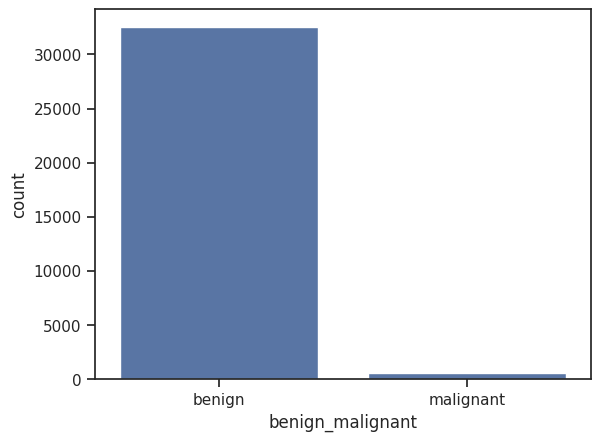

In [23]:
sns.countplot(data=isic, x="benign_malignant"); # same as target

In [30]:
isic["benign_malignant"].value_counts()

benign_malignant
benign       32542
malignant      584
Name: count, dtype: int64

In [31]:
isic["benign_malignant"].value_counts(normalize=True)

benign_malignant
benign       0.98237
malignant    0.01763
Name: proportion, dtype: float64

In [37]:
isic["patient_id"].value_counts()

patient_id
IP_7279968    115
IP_4382720    115
IP_4938382    115
IP_4479736    115
IP_0656529    114
             ... 
IP_7765635      3
IP_3424938      3
IP_8003098      3
IP_3645134      3
IP_8335299      2
Name: count, Length: 2056, dtype: int64

In [36]:
isic["lesion_id"].value_counts()

lesion_id
IL_1974508    2
IL_6326207    2
IL_1172115    2
IL_8491033    2
IL_6859221    2
             ..
IL_7882491    1
IL_1927454    1
IL_1836202    1
IL_3350855    1
IL_5788213    1
Name: count, Length: 32701, dtype: int64

In [39]:
isic[isic['benign_malignant'] == 'malignant'].groupby('patient_id').size()


patient_id
IP_0038545    1
IP_0059113    1
IP_0093378    1
IP_0135517    1
IP_0170821    1
             ..
IP_9936643    1
IP_9942136    1
IP_9952683    1
IP_9954107    2
IP_9997715    3
Length: 428, dtype: int64

In [44]:
isic[isic["benign_malignant"] == "malignant"].groupby("lesion_id").size() # 

lesion_id
IL_0015385    1
IL_0028657    1
IL_0043116    1
IL_0060816    1
IL_0065038    1
             ..
IL_9930086    1
IL_9962860    1
IL_9972250    1
IL_9978542    1
IL_9980924    1
Length: 581, dtype: int64

In [45]:
len(isic[isic["benign_malignant"] == "malignant"])

584

In [47]:
isic[isic["benign_malignant"] == "malignant"].groupby("lesion_id").size().value_counts()

1    578
2      3
Name: count, dtype: int64

In [53]:
isic[isic["benign_malignant"] == "malignant"].groupby("lesion_id").size().value_counts(normalize=True)

1    0.994836
2    0.005164
Name: proportion, dtype: float64

In [52]:
isic[isic["benign_malignant"] == "malignant"].groupby("lesion_id").filter(lambda x: len(x) > 1).sort_values("lesion_id")


,image_name,patient_id,lesion_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
20915,ISIC_6352565,IP_4130585,IL_0117335,female,65.0,lower extremity,melanoma,malignant,1
21737,ISIC_6584579,IP_4130585,IL_0117335,female,65.0,lower extremity,melanoma,malignant,1
8363,ISIC_2607827,IP_7887363,IL_2267077,male,60.0,upper extremity,melanoma,malignant,1
33014,ISIC_9967383,IP_7887363,IL_2267077,male,60.0,upper extremity,melanoma,malignant,1
91,ISIC_0149568,IP_0962375,IL_6540984,female,55.0,upper extremity,melanoma,malignant,1
29827,ISIC_9022005,IP_0962375,IL_6540984,female,55.0,upper extremity,melanoma,malignant,1


In [54]:
duplicates.head()

,image_name_1,image_name_2
0,ISIC_0079038,ISIC_8521950
1,ISIC_0087297,ISIC_4755972
2,ISIC_0088137,ISIC_4201955
3,ISIC_0112097,ISIC_5934021
4,ISIC_0148783,ISIC_7460560


In [56]:
duplicates.shape

(425, 2)

In [58]:
isic[isic["image_name"].isin(duplicates["image_name_1"])].groupby("benign_malignant").size()

benign_malignant
benign       422
malignant      3
dtype: int64

In [59]:
isic[isic["image_name"].isin(duplicates["image_name_2"])].groupby(
    "benign_malignant"
).size()

benign_malignant
benign       422
malignant      3
dtype: int64

## Remove duplicate entries

In [60]:
isic_no_duplicates = isic[~isic["image_name"].isin(duplicates["image_name_1"])]

In [61]:
isic_no_duplicates.shape

(32701, 9)

In [64]:
print(f"Duplicates: {len(isic) - len(isic_no_duplicates)} images removed")

Duplicates: 425 images removed


In [65]:
# save to file
isic_no_duplicates.to_csv(METADATA_DIR + "isic_no_duplicates.csv", index=False)

In [67]:
# remove uncessary columns
isic_trimmed = isic_no_duplicates[['image_name', 'target']]


In [68]:
# save to file
isic_trimmed.to_csv(METADATA_DIR + "isic_trimmed.csv", index=False)

In [69]:
isic_trimmed.head()

,image_name,target
0,ISIC_2637011,0
1,ISIC_0015719,0
2,ISIC_0052212,0
3,ISIC_0068279,0
4,ISIC_0074268,0


In [76]:
isic_trimmed["target"].value_counts()

target
0    32120
1      581
Name: count, dtype: int64

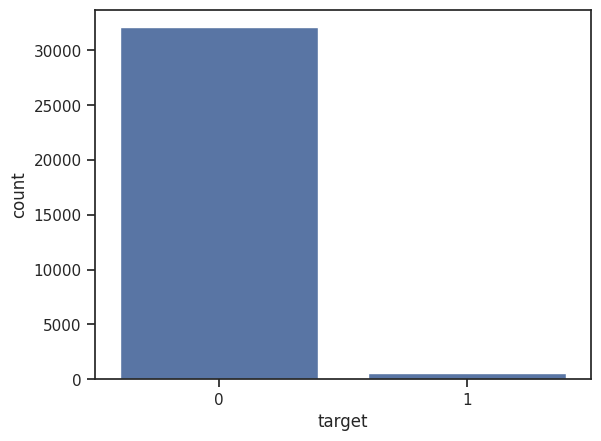

In [70]:
sns.countplot(data=isic_trimmed, x="target");

In [71]:
# Get the number of target=1 samples
target_1_count = len(isic_trimmed[isic_trimmed['target'] == 1])
print(f"Target=1 count: {target_1_count}")

# Get a random sample of target=0 with the same count as target=1
target_0_samples = isic_trimmed[isic_trimmed['target'] == 0].sample(n=target_1_count, random_state=111)
print(f"Target=0 sample count: {len(target_0_samples)}")

# Combine the target=0 and target=1 samples
combined_samples = pd.concat([target_0_samples, isic_trimmed[isic_trimmed['target'] == 1]])

# Shuffle the combined samples
combined_samples = combined_samples.sample(frac=1, random_state=111)


Target=1 count: 581
Target=0 sample count: 581


In [72]:
combined_samples.head()

,image_name,target
7487,ISIC_2339423,0
16129,ISIC_4936662,1
3140,ISIC_1044129,0
12278,ISIC_3778192,1
12879,ISIC_3965087,1


In [73]:
combined_samples.shape

(1162, 2)

In [77]:
combined_samples["target"].value_counts()

target
0    581
1    581
Name: count, dtype: int64

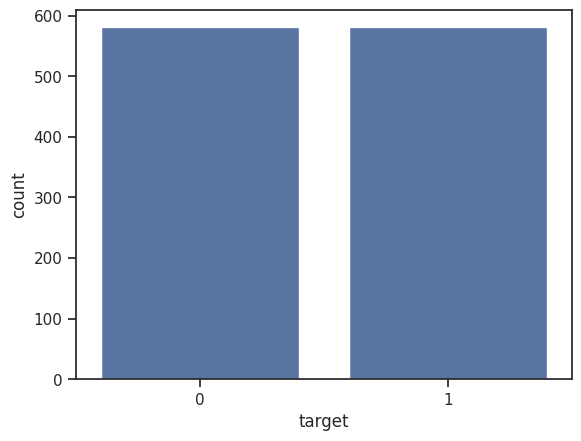

In [74]:
sns.countplot(data=combined_samples, x="target");

In [75]:
# save to file
combined_samples.to_csv(METADATA_DIR + "isic_trimmed_balanced.csv", index=False)